In [2]:
import torch
import torchio as tio
import nibabel
import glob
import matplotlib.pyplot as plt

from tqdm.contrib import tzip
from tqdm import trange

from torchio.transforms import (
    RandomFlip,
    RandomAffine,
    RandomElasticDeformation, 
    RandomNoise,
    RandomMotion,
    RandomBiasField,
    RescaleIntensity,
    Resample,
    ToCanonical,
    ZNormalization,
    CropOrPad,
    HistogramStandardization,
    OneOf,
    Compose,
)

In [3]:
transform = tio.Compose([
    # ToCanonical(),
    # Resample(4),
    CropOrPad((144,144,144)),
    # RandomMotion(p=0.2),
    # RandomBiasField(p=0.3),
    # RandomNoise(p=0.5),
    # RandomFlip(axes=(0,)),
    # RandomAffine(p=0.5),
    # RandomElasticDeformation(p=0.5),
    # ZNormalization(),
])

In [4]:
dataset_path = r'datasets\MICCAI_2008_MS_Lesions'

flair_paths = sorted(glob.glob(f'{dataset_path}/training/*/*/*_flair_pp.nii.gz'))
mask_paths = sorted(glob.glob(f'{dataset_path}/training/*/*/*mask2.nii.gz'))

sample_per_image = 1
paths = enumerate(tzip(flair_paths,mask_paths, 
                        desc=f"train : flair, mprage, t2w, pdw and label .nii.gz to .npy", 
                        total=len(flair_paths), leave= True))

subjects = []
for idx,path in paths:
    for _ in trange(sample_per_image, leave=False):
        flair_path = path[0]
        mask_path = path[1]

        # flair_nii = nib.load(flair_path)
        # mask_nii = nib.load(mask_path)

        # flair_nii = np.squeeze(flair_nii.get_fdata(dtype=np.float32))
        # mask_nii = np.squeeze(mask_nii.get_fdata(dtype=np.float32))

        # flair_tensor = torch.from_numpy(flair_nii)
        # mask_tensor = torch.from_numpy(mask_nii)

        subject = tio.Subject(
                flair = tio.ScalarImage(flair_path),
                label = tio.LabelMap(mask_path),
        )

        subject = transform(subject)
        subjects.append(subject)

dataset = tio.SubjectsDataset(subjects)

train : flair, mprage, t2w, pdw and label .nii.gz to .npy:   0%|          | 0/21 [00:00<?, ?it/s]
100%|██████████| 1/1 [00:00<00:00,  8.22it/s]
train : flair, mprage, t2w, pdw and label .nii.gz to .npy:   5%|▍         | 1/21 [00:00<00:02,  7.83it/s]
100%|██████████| 1/1 [00:00<00:00,  8.15it/s]
train : flair, mprage, t2w, pdw and label .nii.gz to .npy:  10%|▉         | 2/21 [00:00<00:02,  7.80it/s]
100%|██████████| 1/1 [00:00<00:00,  7.06it/s]
train : flair, mprage, t2w, pdw and label .nii.gz to .npy:  14%|█▍        | 3/21 [00:00<00:02,  7.22it/s]
100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
train : flair, mprage, t2w, pdw and label .nii.gz to .npy:  19%|█▉        | 4/21 [00:00<00:02,  6.87it/s]
100%|██████████| 1/1 [00:00<00:00,  4.82it/s]
train : flair, mprage, t2w, pdw and label .nii.gz to .npy:  24%|██▍       | 5/21 [00:00<00:02,  5.88it/s]
100%|██████████| 1/1 [00:00<00:00,  4.84it/s]
train : flair, mprage, t2w, pdw and label .nii.gz to .npy:  29%|██▊       | 6/21 [00:00<00:02,  

21


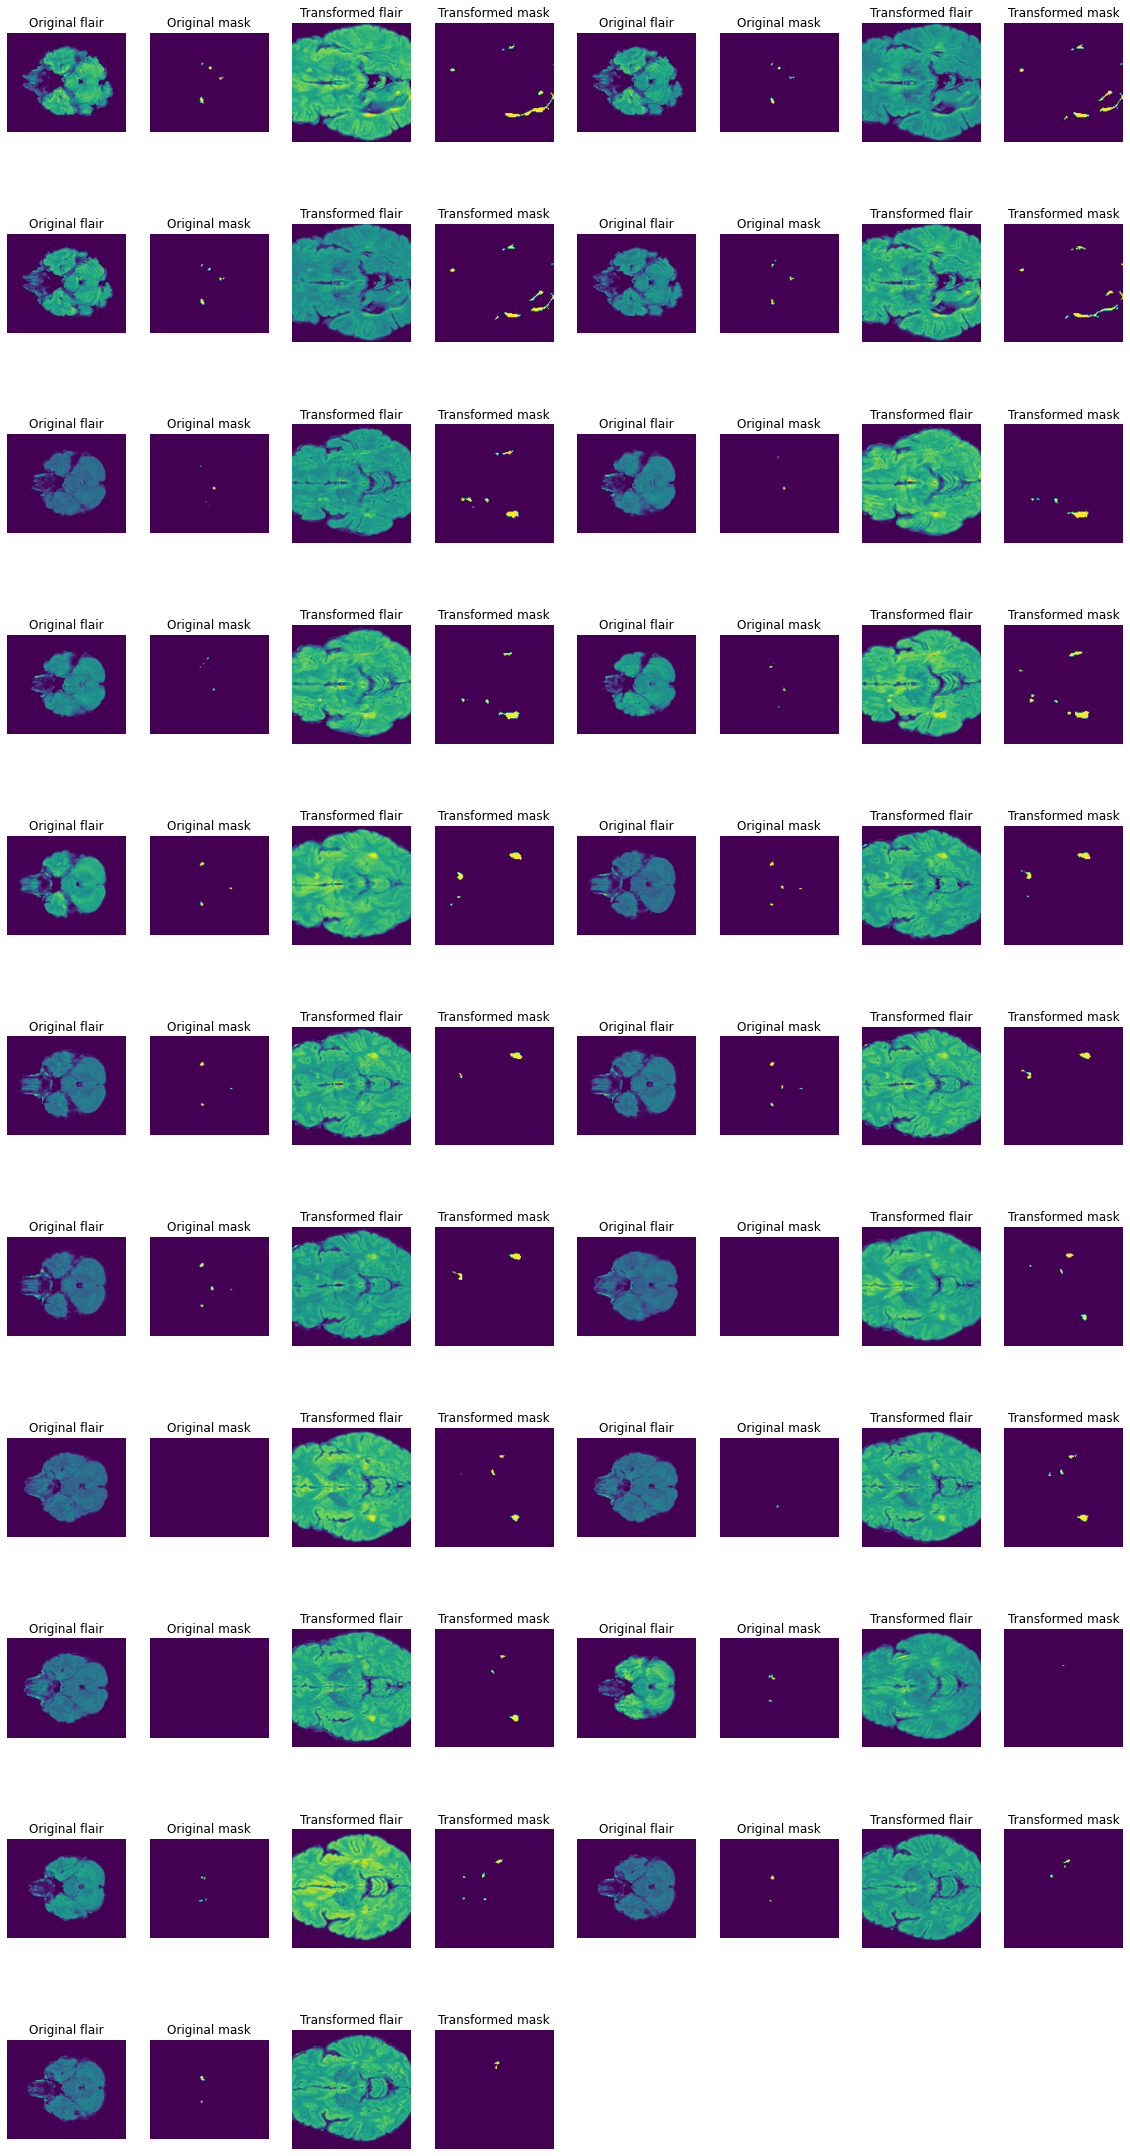

In [4]:
print(len(dataset))

fig = plt.figure(figsize=(20,40))

col = 8
row = (len(dataset) * 4) // col + 1

i = 1
for idx,subject in enumerate(dataset):
    plt.subplot(row,col,i)
    plt.title('Original flair'); plt.axis('off')
    plt.imshow(tio.ScalarImage(flair_paths[idx // sample_per_image]).data.detach().numpy()[0][:,:,50]); i+=1
    plt.subplot(row,col,i)
    plt.title('Original mask'); plt.axis('off')
    plt.imshow(tio.LabelMap(mask_paths[idx // sample_per_image]).data.detach().numpy()[0][:,:,50]); i+=1
    plt.subplot(row,col,i)
    plt.title('Transformed flair'); plt.axis('off')
    plt.imshow(subject.flair.data.detach().numpy()[0][:,:,50]); i+=1
    plt.subplot(row,col,i)
    plt.title('Transformed mask'); plt.axis('off')
    plt.imshow(subject.label.data.detach().numpy()[0][:,:,50]); i+=1

plt.savefig("transform.png")

In [7]:
dataset[0].flair.data.dtype

torch.float32

In [8]:
import torch

a = torch.FloatTensor([1,2,3,4])

In [9]:
a

tensor([1., 2., 3., 4.])

In [ ]:
a = a.byte()